### Data Source 
https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?resource=download

In [1]:
print('bismillah')

bismillah


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


In [3]:
df = pd.read_csv('data/StudentsPerformance.csv')

In [4]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


### changing column name for better understand

In [5]:
df.columns = ['gender','race_ethnicity','parental_level_of_education','lunch','test_preparation_course','math_score','reading_score','writing_score']

In [6]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [7]:
df.shape

(1000, 8)

### check missing value 

In [8]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

#### there is no any missing values 

### check duplicates 

In [9]:
df.duplicated().sum()

np.int64(0)

#### there is no any duplicated values 

### check data types 

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### checking the number of unique value of each column 

In [11]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

### check statistic of data 

In [12]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### insight 
 
 - all mean values are around in 60-70
 - standard deviation about to 15-17
 - min around 10 and maxinmum are found in 100 

## exploring data 

In [13]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [14]:
print('categories of "gender" variable :'     ,end=' ')
print(df['gender'].unique())

print('categories of "race_ethnicity" variable :'     ,end=' ')
print(df['race_ethnicity'].unique())

print(f"categoreis of 'parental_level_of_education' :  {df['parental_level_of_education'].unique()}")

print('categories of "lunch" variable :'     ,end=' ')
print(df['lunch'].unique())

print('categories of "test_preparation_course" variable :'     ,end=' ')
print(df['test_preparation_course'].unique())

categories of "gender" variable : ['female' 'male']
categories of "race_ethnicity" variable : ['group B' 'group C' 'group A' 'group D' 'group E']
categoreis of 'parental_level_of_education' :  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
categories of "lunch" variable : ['standard' 'free/reduced']
categories of "test_preparation_course" variable : ['none' 'completed']


In [15]:
##define numerical and categorical features 

numerical = [feature for feature in df.columns if df[feature].dtype!='O']
categorical = [feature for feature in df.columns if df[feature].dtype=='O']


print(' {} number of numerical feature : {}'.format(len(numerical),numerical))
print(' {} number of categorical feature : {}'.format(len(categorical),categorical))

 3 number of numerical feature : ['math_score', 'reading_score', 'writing_score']
 5 number of categorical feature : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


### Adding columns for Total score and average [feature engineering]

In [16]:
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['Average'] = df['total_score']/3
df.sample(5)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,Average
731,male,group A,some high school,free/reduced,none,55,46,43,144,48.000000
147,male,group C,associate's degree,free/reduced,none,73,68,66,207,69.000000
830,female,group A,some college,free/reduced,none,61,60,57,178,59.333333
406,male,group B,associate's degree,standard,completed,65,65,63,193,64.333333
387,female,group C,associate's degree,free/reduced,none,57,78,67,202,67.333333


In [17]:
full_on_reading = df[df['reading_score'] == 100]['total_score'].count()
full_on_writing = df[df['writing_score'] == 100]['Average'].count()
full_on_maths = df[df['math_score'] == 100]['reading_score'].count()


print(f'number of students with full marks on Maths : {full_on_maths}')
print(f'number of students with full marks on Writing : {full_on_writing}')
print(f'number of students with full marks on Reading : {full_on_reading}')

number of students with full marks on Maths : 7
number of students with full marks on Writing : 14
number of students with full marks on Reading : 17


In [18]:
full_on_reading = df[df['reading_score'] <= 20]['total_score'].count()
full_on_writing = df[df['writing_score'] <= 20]['Average'].count()
full_on_maths = df[df['math_score'] <= 20]['reading_score'].count()


print(f'number of students with less than 20 marks  on Maths : {full_on_maths}')
print(f'number of students with less than 20 marks  on Writing : {full_on_writing}')
print(f'number of students with less than 20 marks  on Reading : {full_on_reading}')

number of students with less than 20 marks  on Maths : 4
number of students with less than 20 marks  on Writing : 3
number of students with less than 20 marks  on Reading : 1


### insight

 - above observation , students are worst in maths
 - they are good in reading 

## Visualizing the data 

####  1, Histogram and KDE 

<Axes: xlabel='Average', ylabel='Count'>

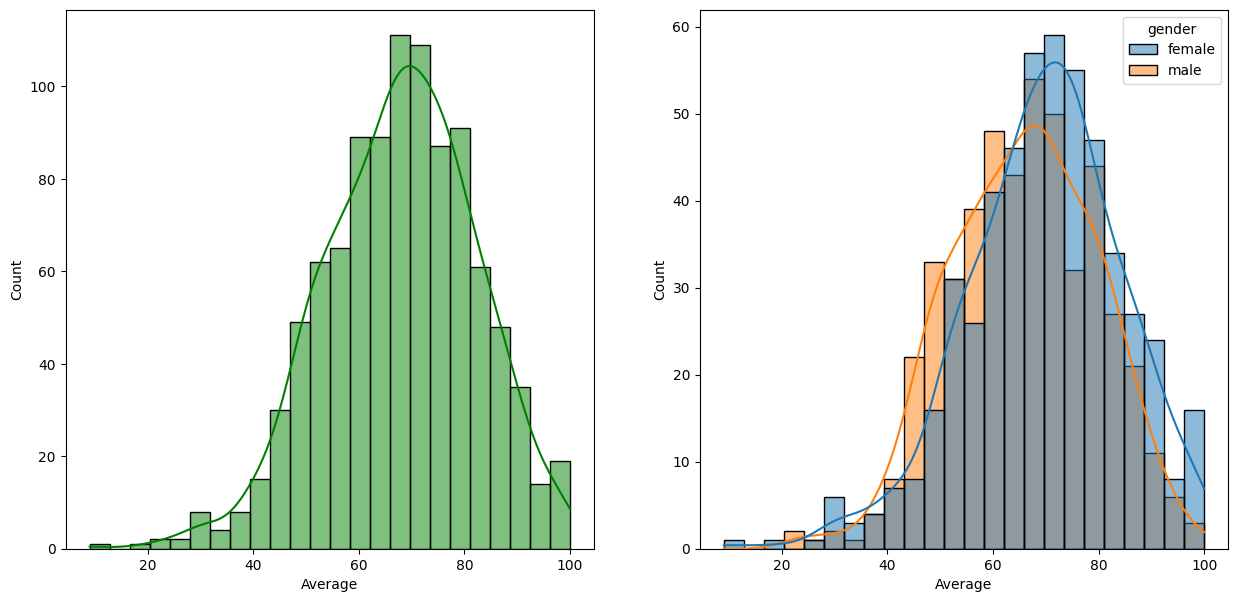

In [19]:
fig, axs = plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x=df['Average'],kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x=df['Average'],kde=True,hue='gender')


<Axes: xlabel='total_score', ylabel='Count'>

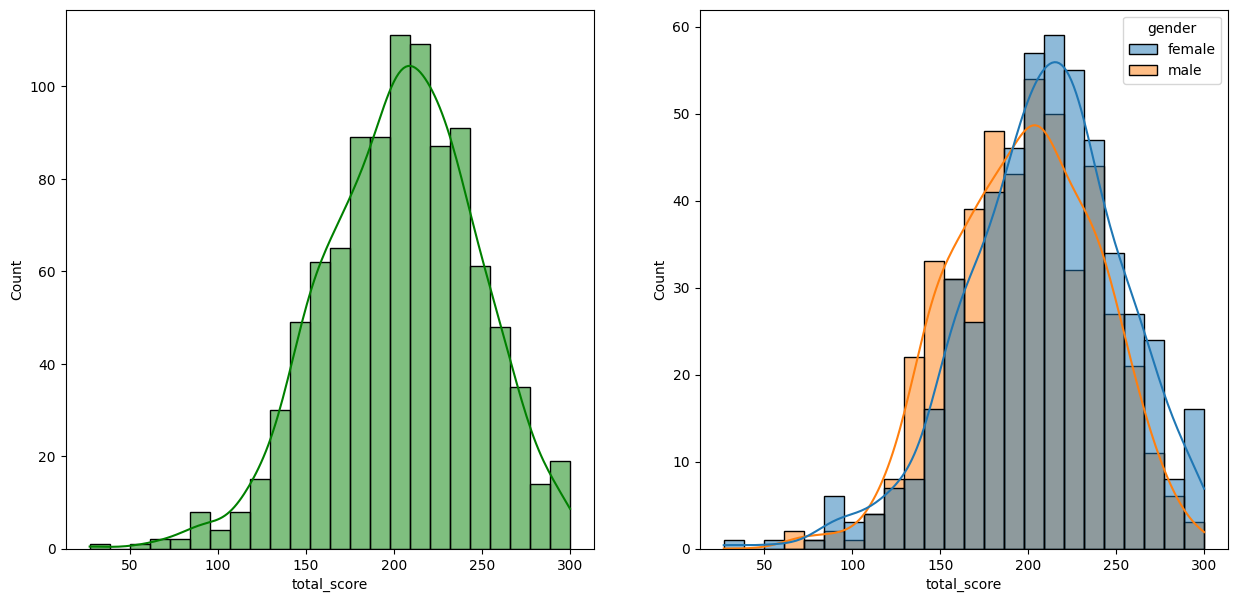

In [20]:
fig, axs = plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x=df['total_score'],kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x=df['total_score'],kde=True,hue='gender')

## insight 

- female students are doing good performance than male students 

<Axes: xlabel='Average', ylabel='Count'>

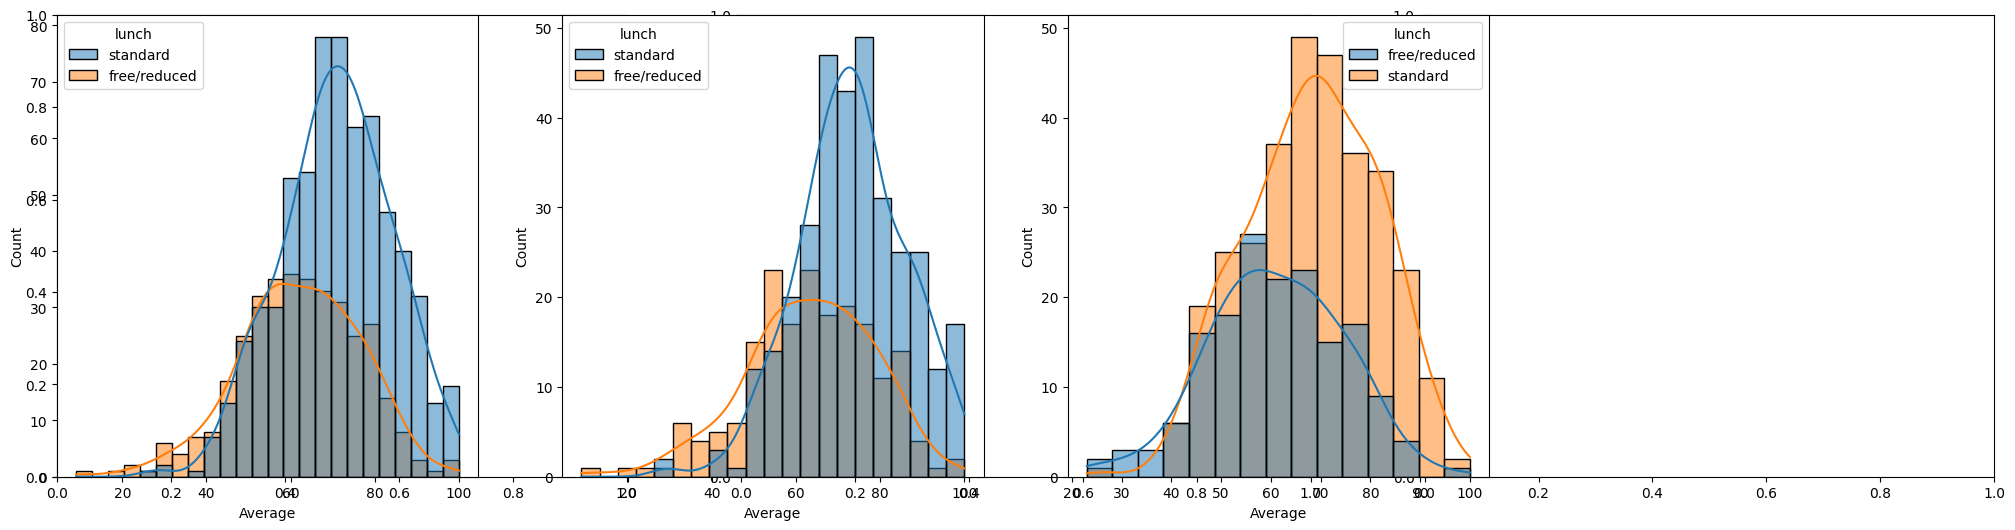

In [21]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='Average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='Average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='Average',kde=True,hue='lunch')

### insight 

- standard lunch helps to perform on exam 
- for both female and male standard lunch are doing well 

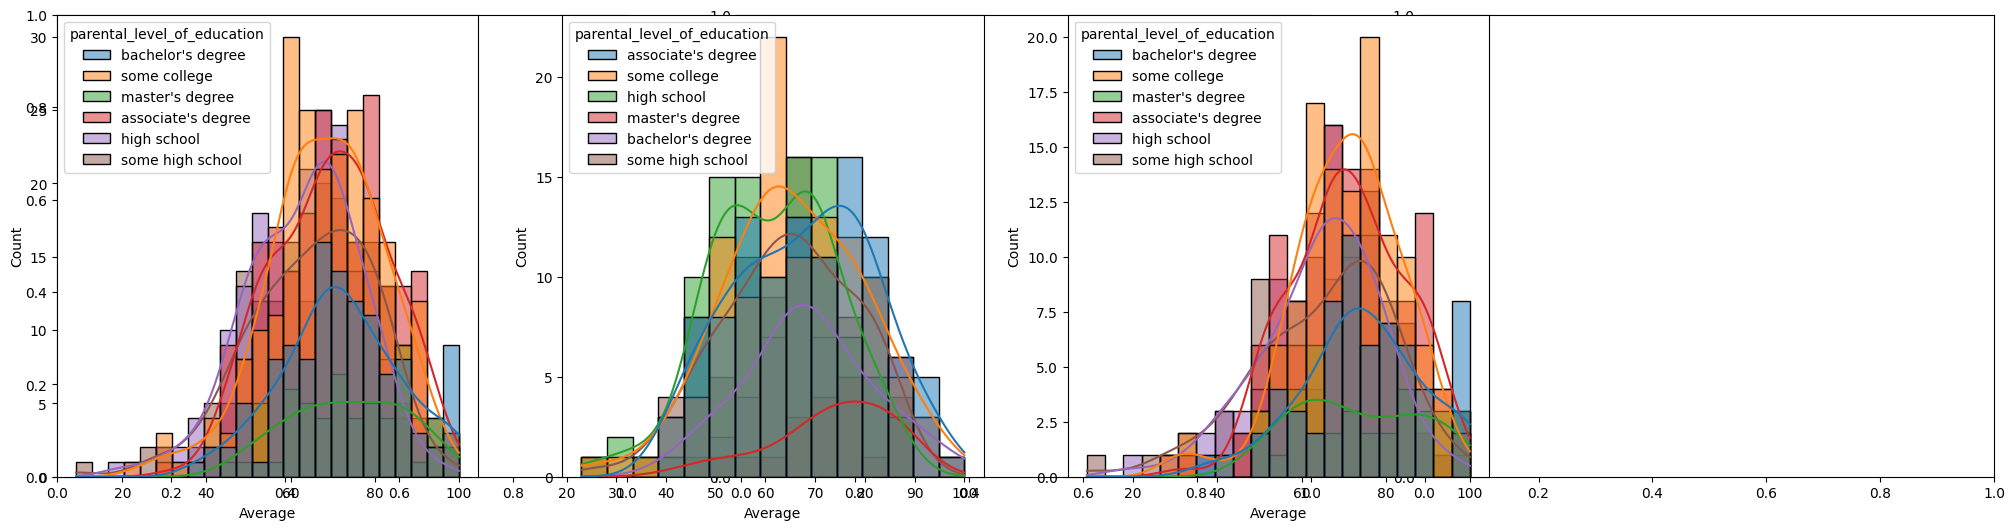

In [22]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='Average',kde=True,hue='parental_level_of_education')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='male'],x='Average',kde=True,hue='parental_level_of_education')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='female'],x='Average',kde=True,hue='parental_level_of_education')

### insight 

- generally , parents education not helps student to perform well in exam 


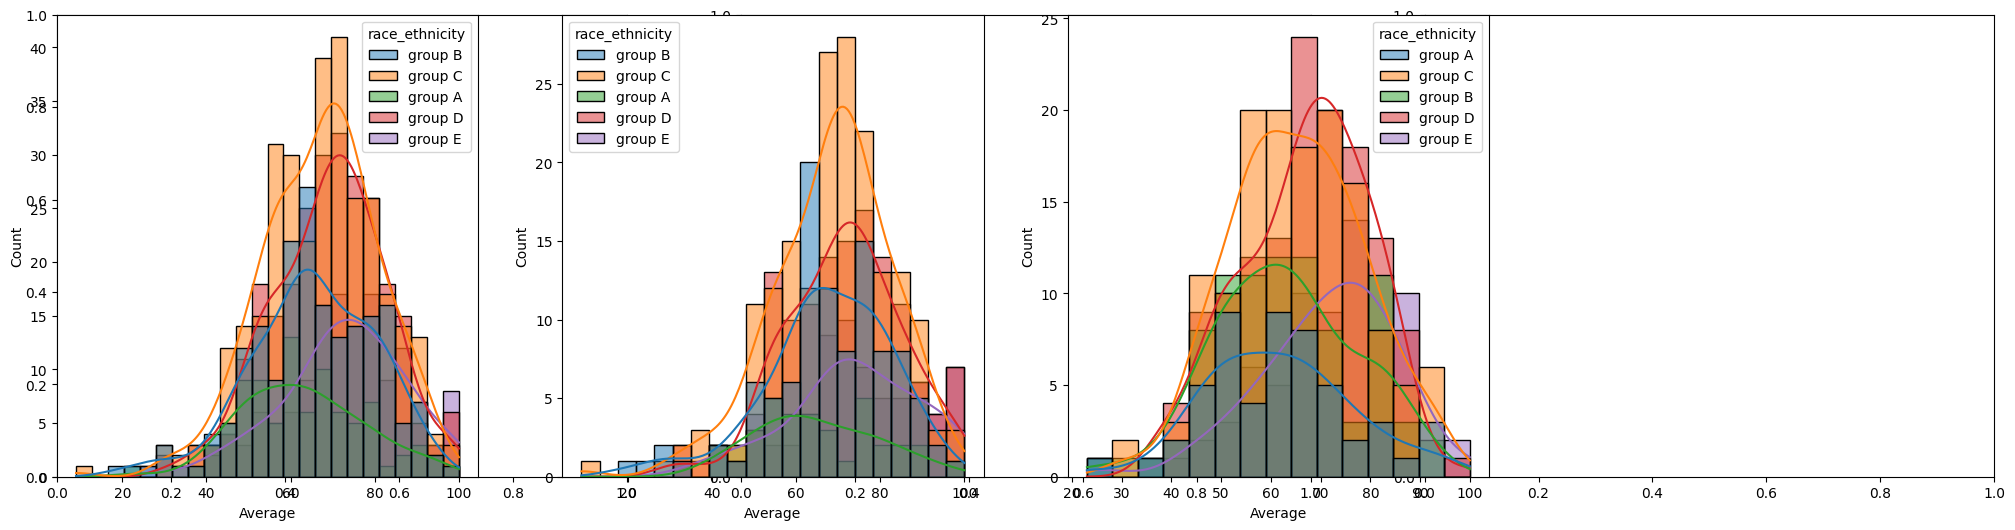

In [23]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='Average',kde=True,hue='race_ethnicity')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='female'],x='Average',kde=True,hue='race_ethnicity')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='male'],x='Average',kde=True,hue='race_ethnicity')
plt.show()

### insight 

- students of groupA and groupB are not well 

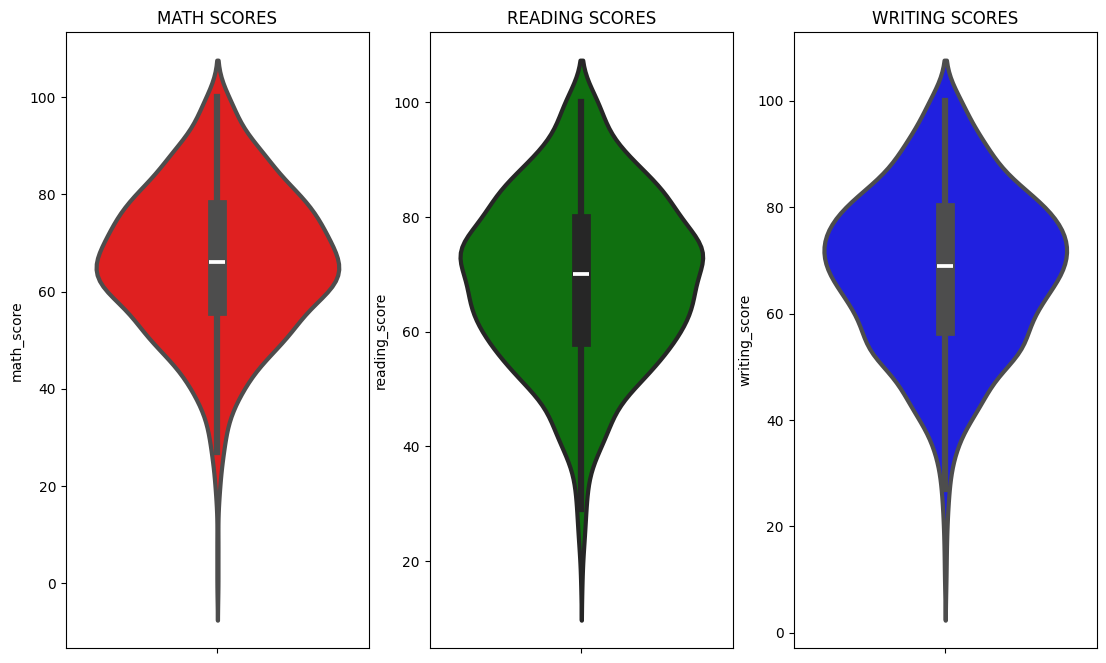

In [24]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

### insight 

- Most of the students marks of maths are falled on btween 60 - 80
- In reading 50-80
- 40 - 80 for writing  

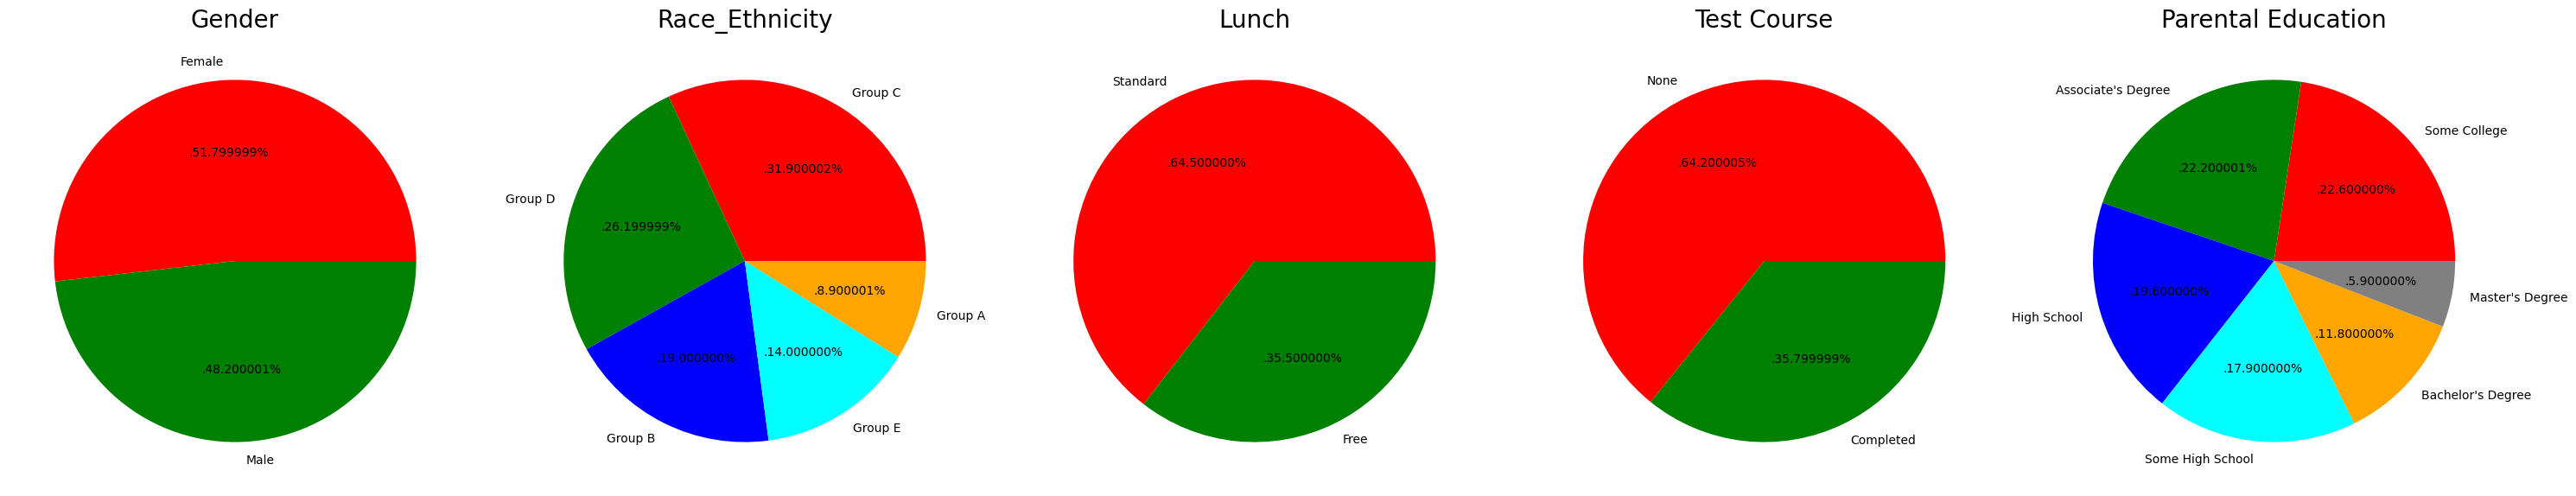

In [25]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race_Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

### insight 

- In gender , both of male and females are equal 
- GROUP C HAS  more race_ethnicity
- most of the students are taken Satnadard Lunch
- parental education are mostly seen on some college 

##  FEATURE WISE VISUALIZATION 

### Univariate analysis

### gender  

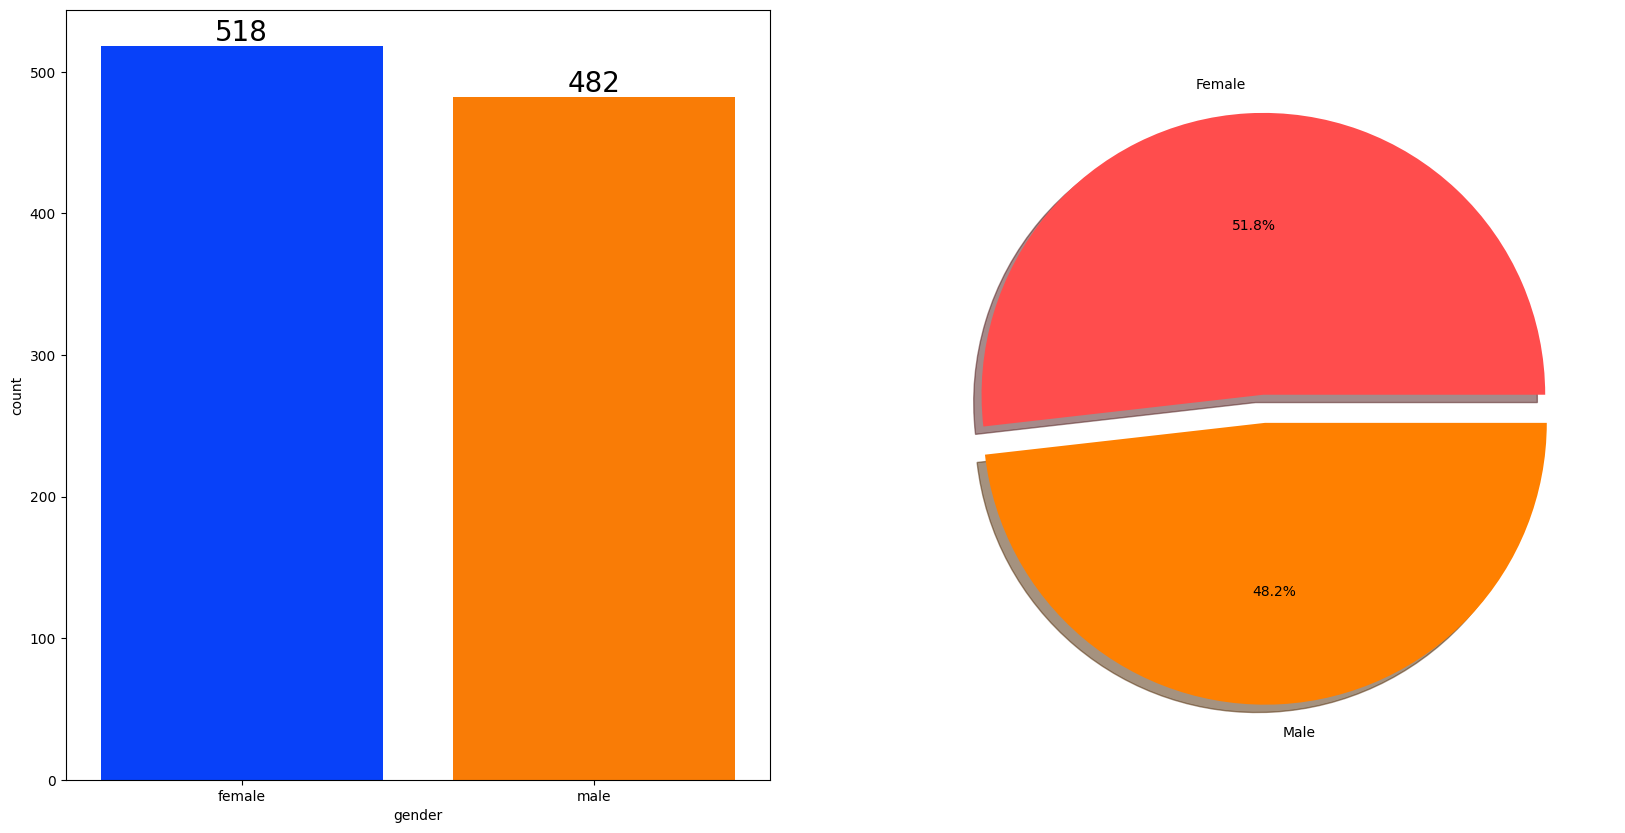

In [26]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Female','Male'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

## Insight 

- more students are from female sides

### Bivariate Analysis

In [27]:
gender_group = df.groupby('gender').mean(numeric_only=True)
gender_group

,math_score,reading_score,writing_score,total_score,Average
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


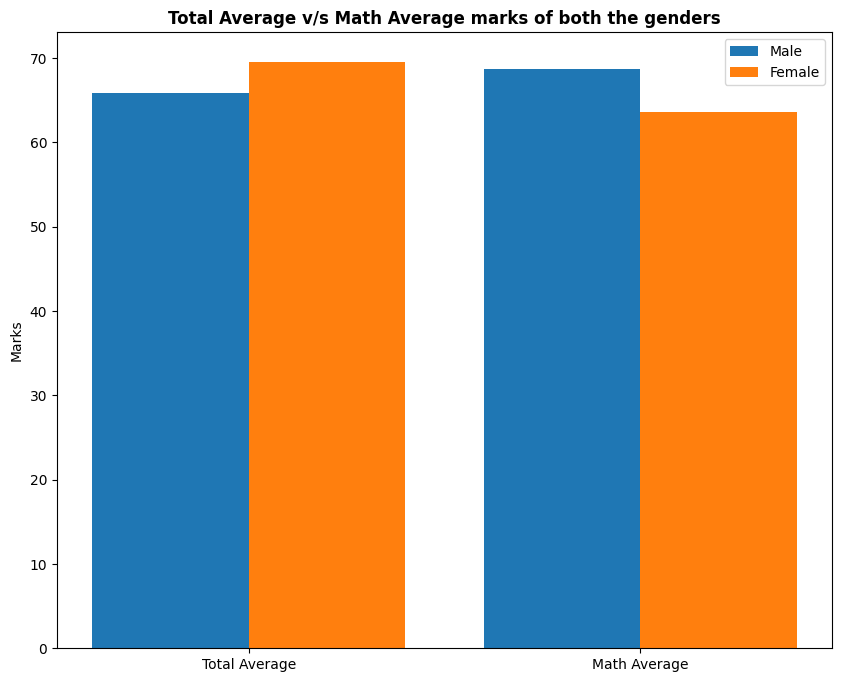

In [28]:
#bivariate
plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']


female_scores = [gender_group['Average'][0], gender_group['math_score'][0]]
male_scores = [gender_group['Average'][1], gender_group['math_score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total Average v/s Math Average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

### insight 
- in maths males are well than female 
- in case of overall performance females ar well 

### race_ethnicity

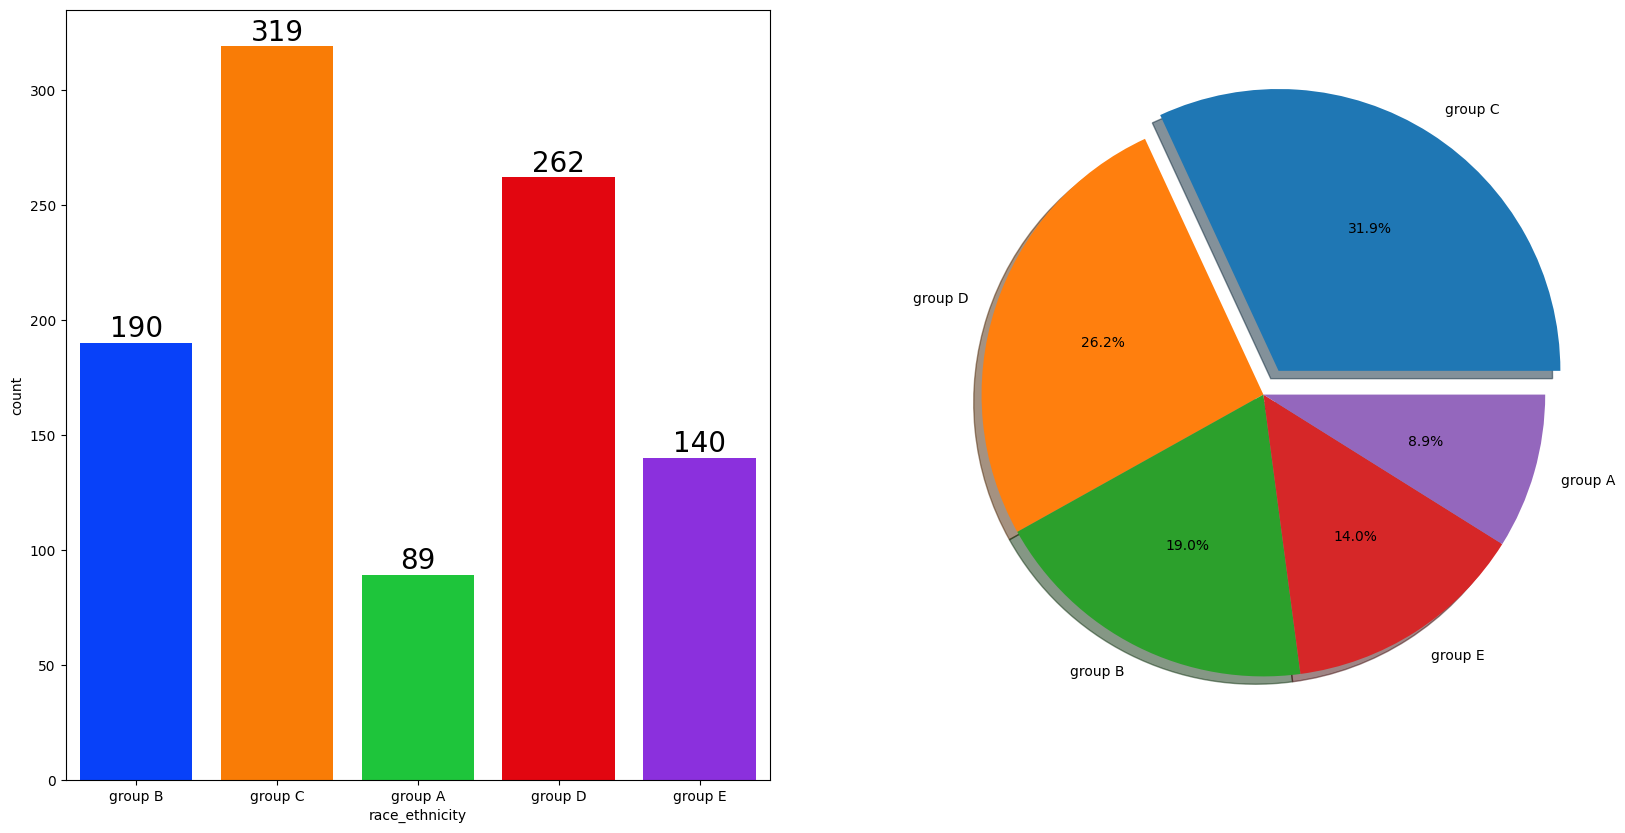

In [29]:
#univariate
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race_ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()   

### insight 
- most of the students are from Group C and Group D 

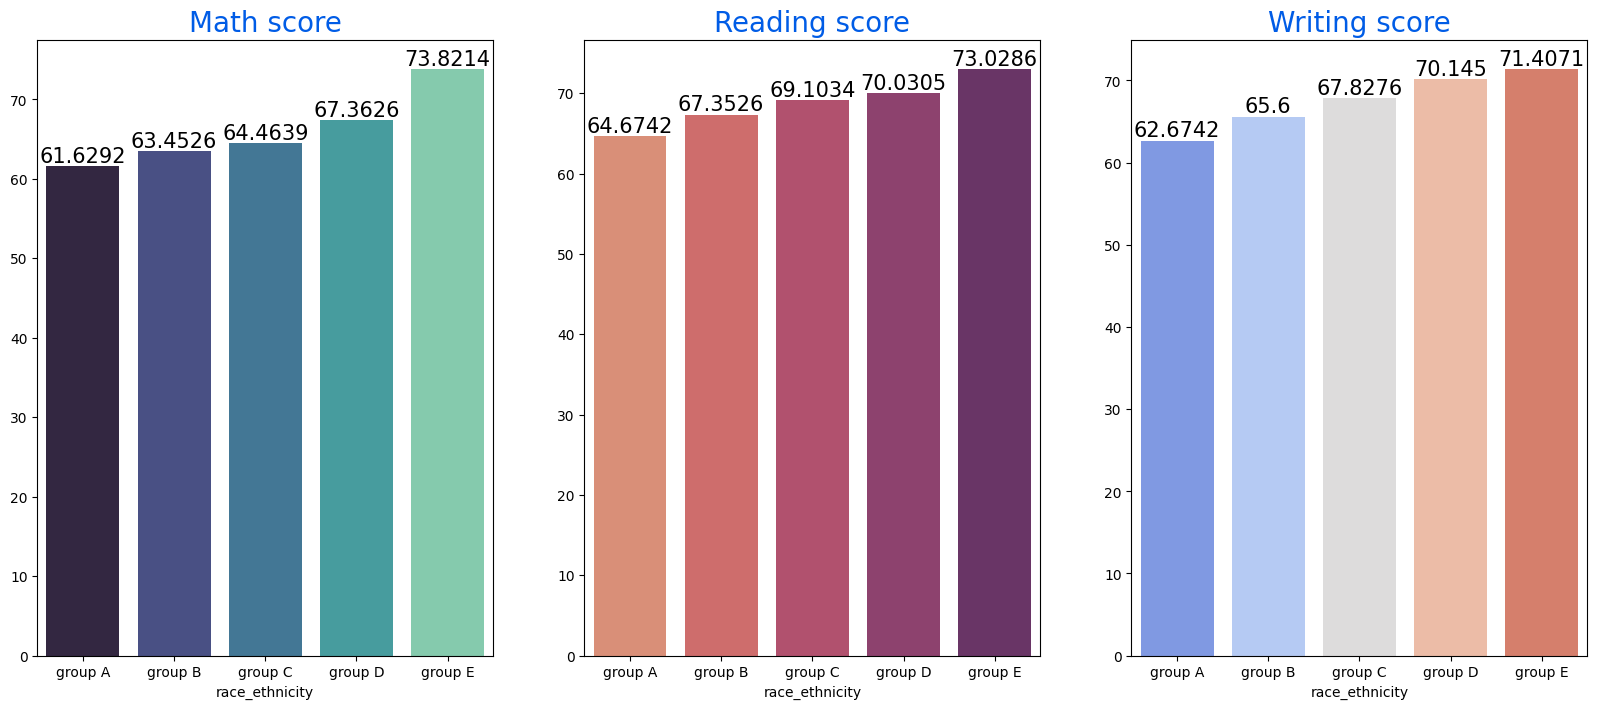

In [30]:
#bivariate
Group_data2=df.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

### insight 
- group E students have high race_ethnicity

## parental level of education

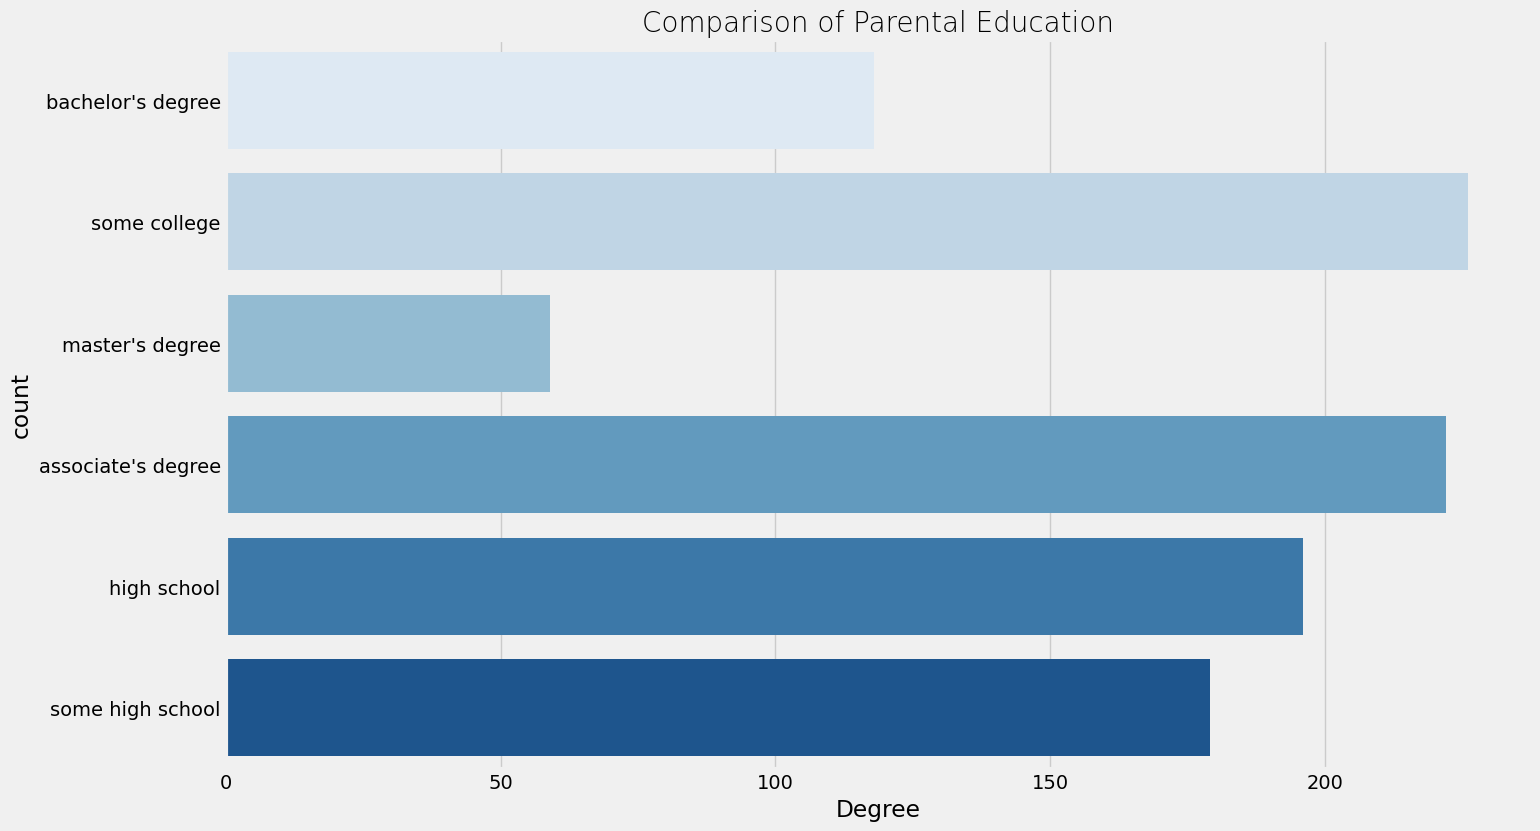

In [31]:
#univariate
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental_level_of_education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

### insight 

- large number of parents are from Some College 

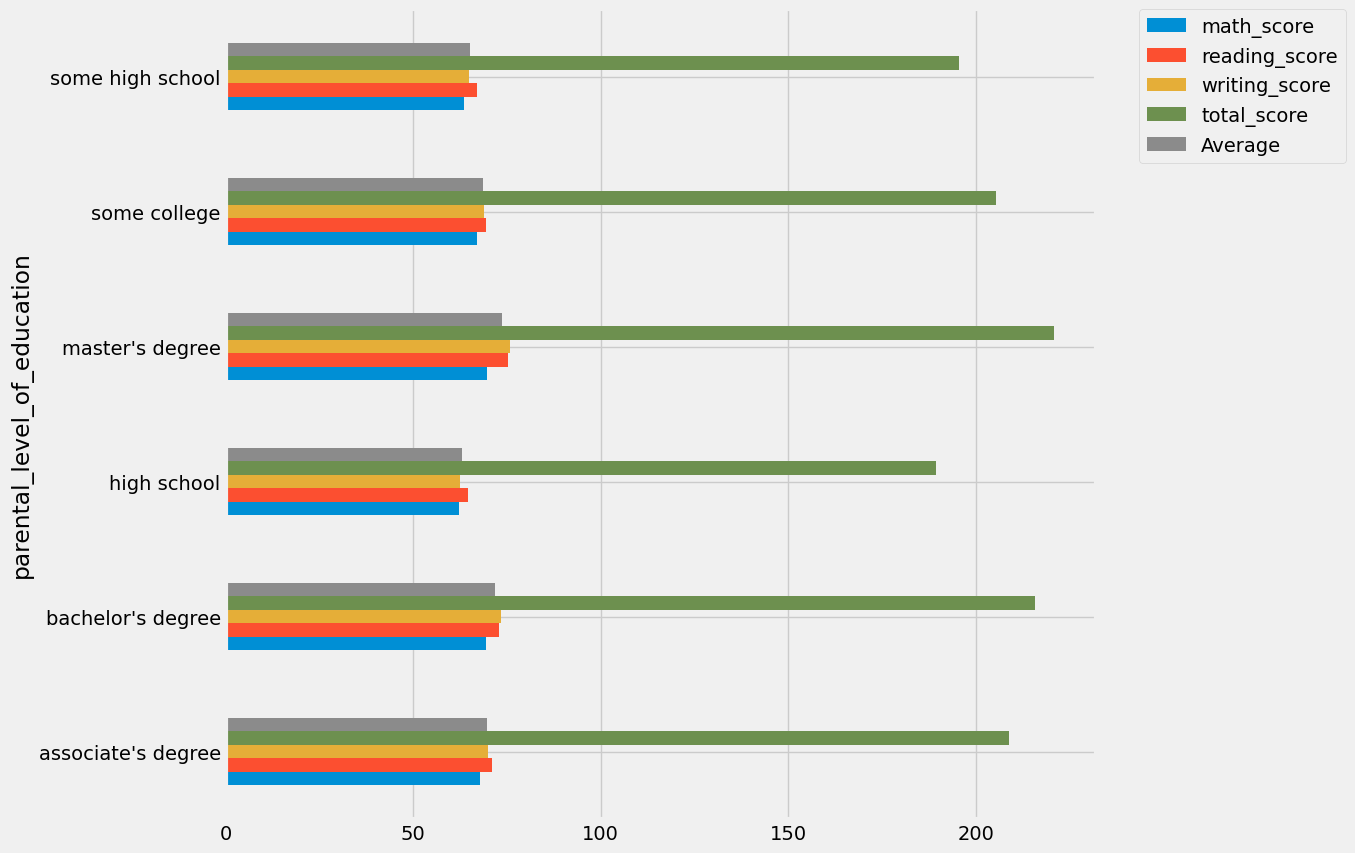

In [32]:
#biavariate 

df.groupby('parental_level_of_education').mean(numeric_only=True).plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

### insight 
- master's and bachleors's childrens are well 

## lunch 

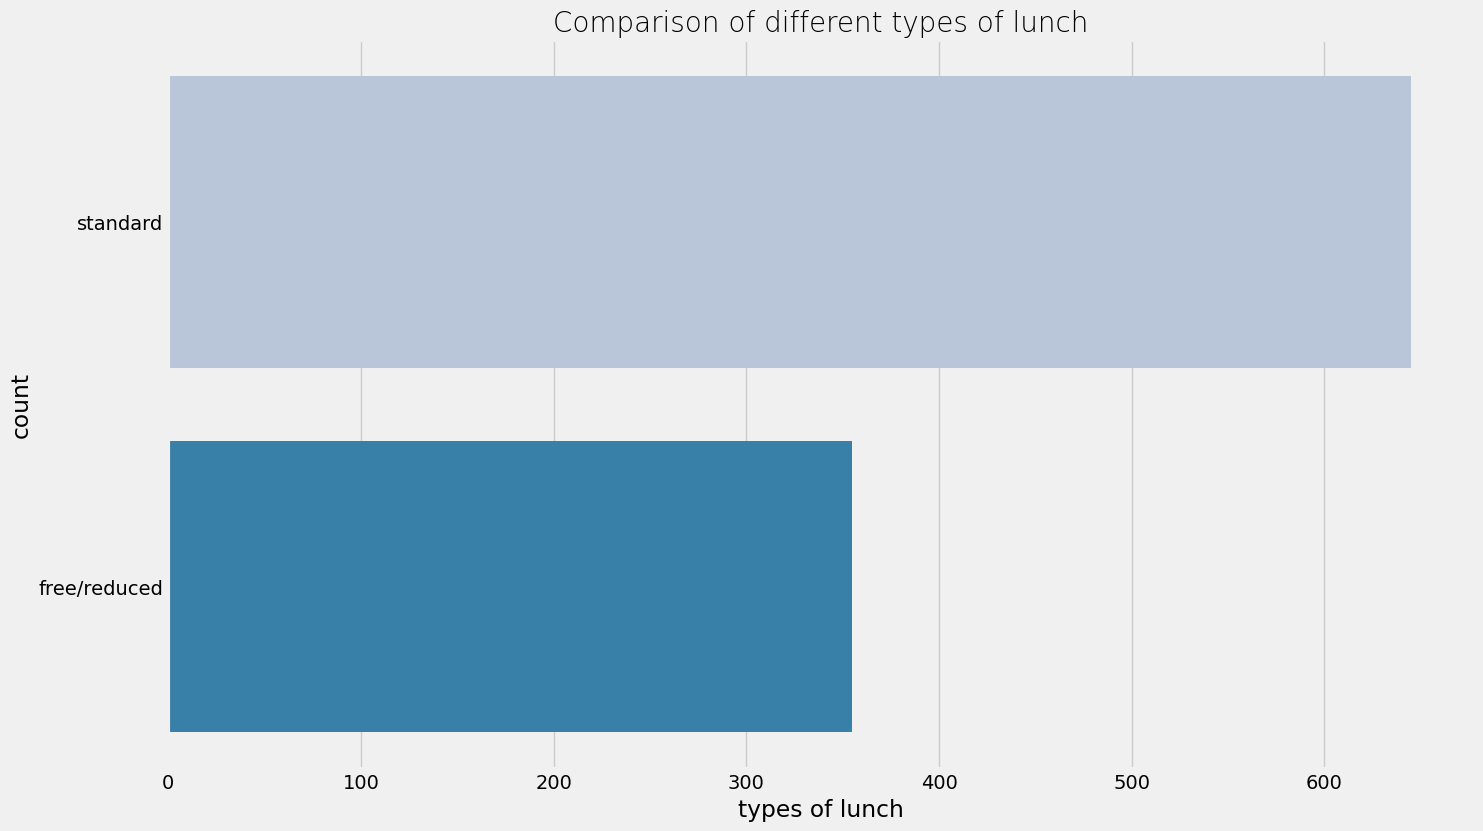

In [33]:
#univarite
plt.rcParams['figure.figsize'] = (15,9)
plt.style.use('seaborn-v0_8-dark-palette')
sns.countplot(df['lunch'], palette = 'PuBu')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

In [34]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'petroff10',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

## insight 
- mot of them are from using LUNCH 

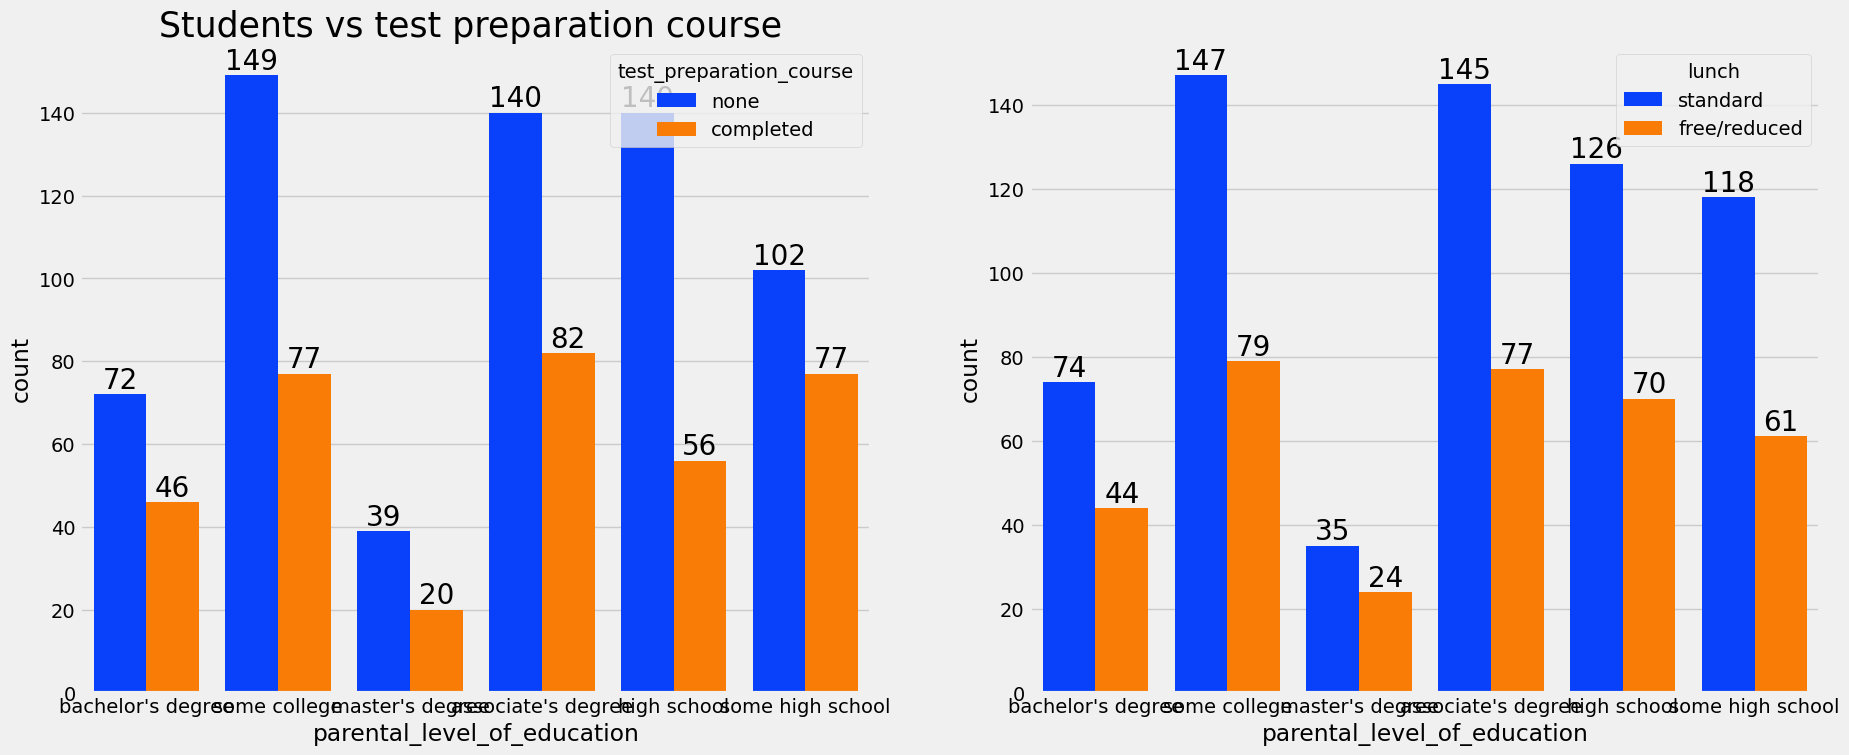

In [35]:
#bivariate 
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'bright',hue='test_preparation_course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs test preparation course ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)

### insight 
- both lunch and preparation are seems same 

## test prepration column 

<Axes: xlabel='lunch', ylabel='writing_score'>

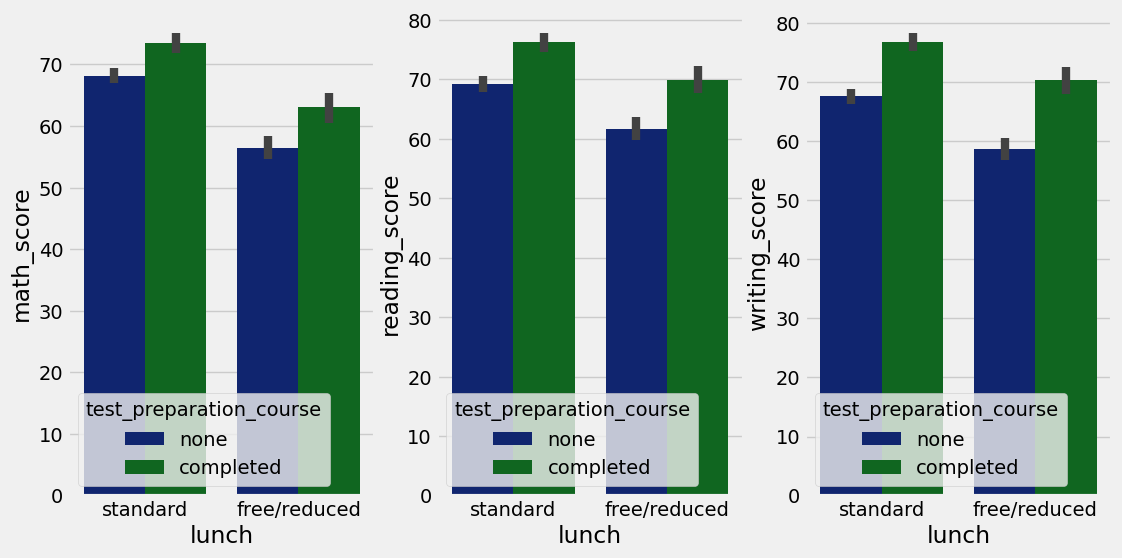

In [36]:
#bivariate
plt.figure(figsize=(12,6))
plt.subplot(1,3,1)
sns.barplot (x=df['lunch'], y=df['math_score'], hue=df['test_preparation_course'])
plt.subplot(1,3,2)
sns.barplot (x=df['lunch'], y=df['reading_score'], hue=df['test_preparation_course'])
plt.subplot(1,3,3)
sns.barplot (x=df['lunch'], y=df['writing_score'], hue=df['test_preparation_course'])

## insight 

- most of the student are complted course which involved in standard Lunch 

## Checking Outlier

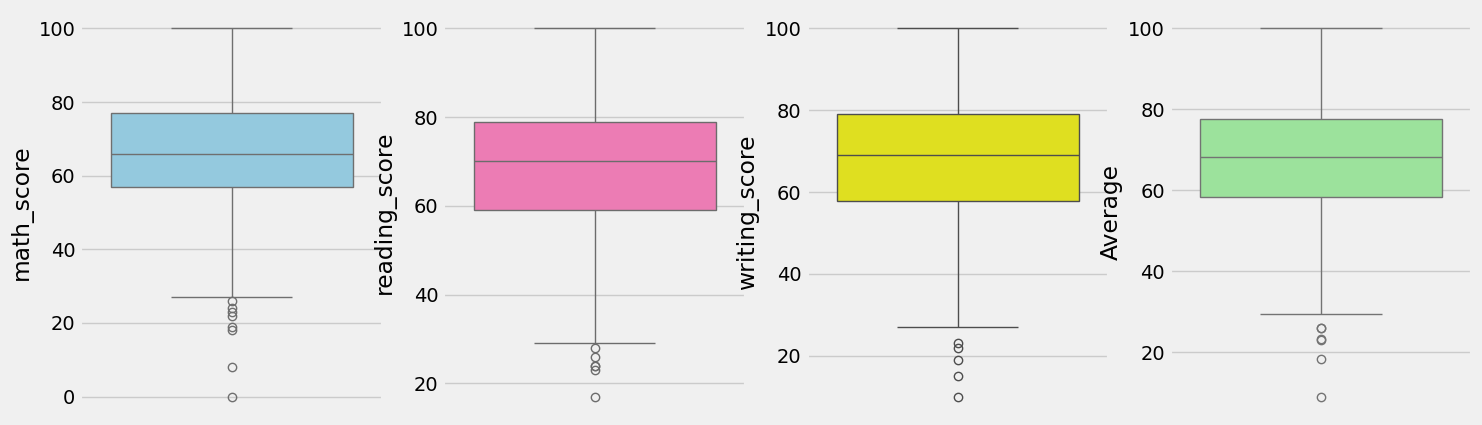

In [37]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['Average'],color='lightgreen')
plt.show()

### Multivariate Analysis Using pairplot

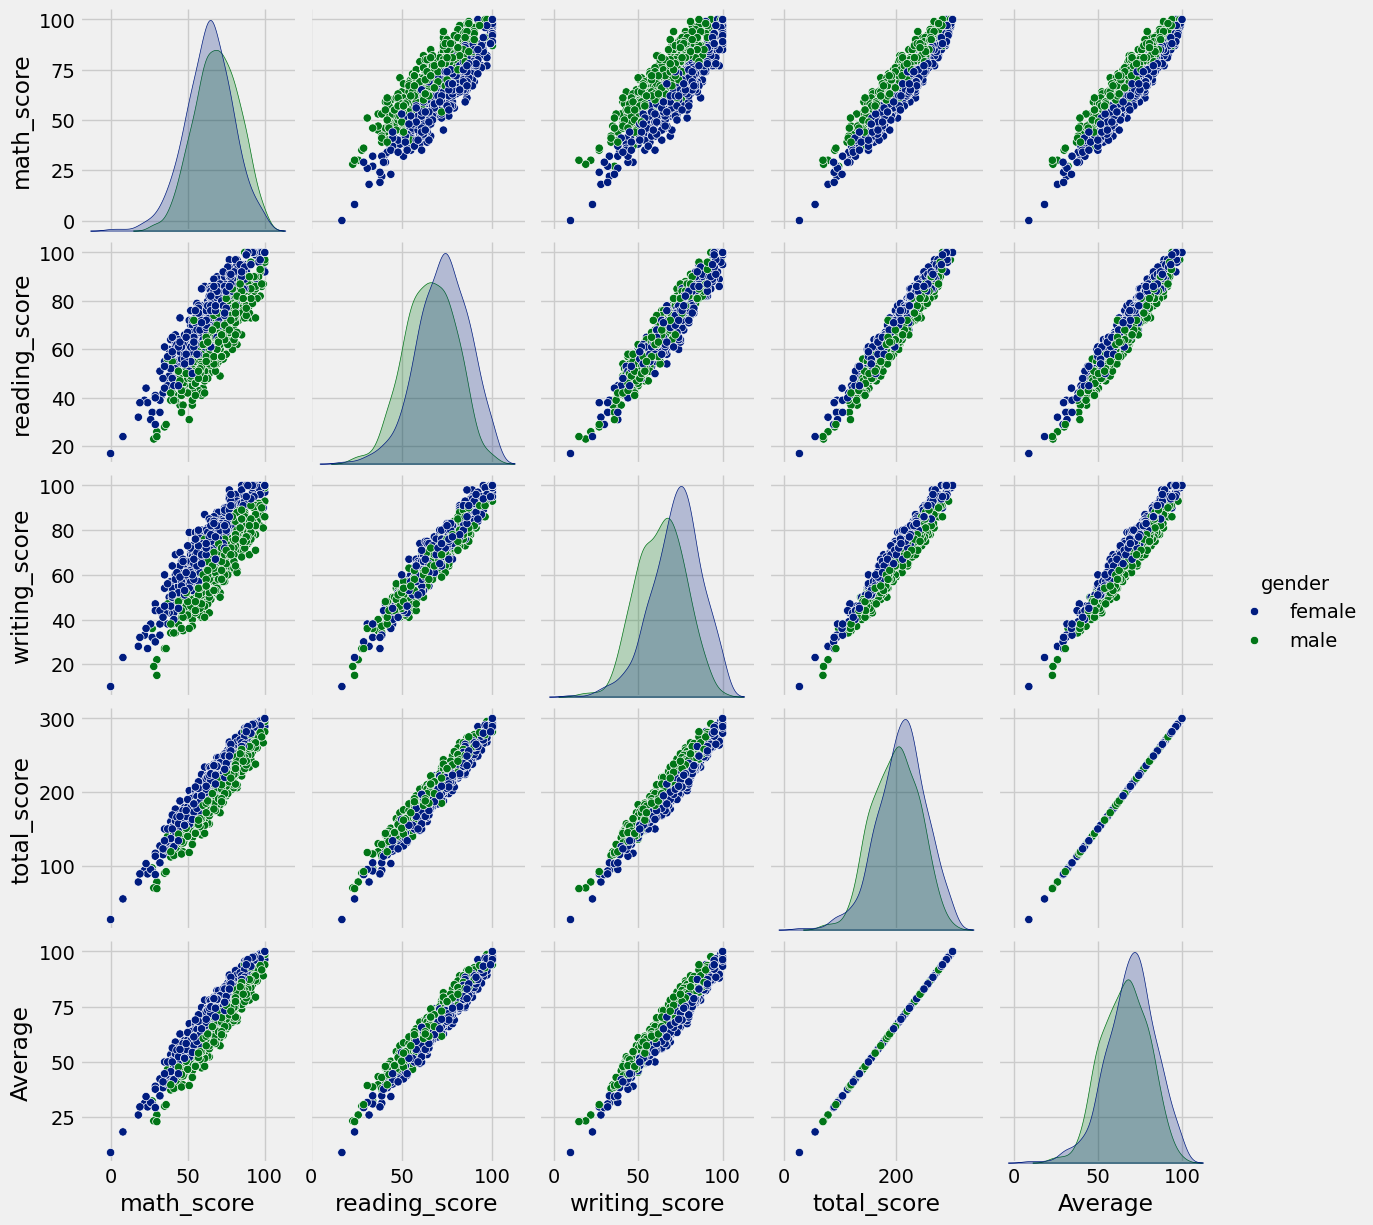

In [38]:
sns.pairplot(df,hue = 'gender')
plt.show()

### insight 

- all scores are increasing bassed on diffrent another scores linearly 

## CONCLUSION

- students performace are related to lunch, parental education, and race_etnincity
- females are lead , acheving to toppers 
- students perfomance not related to test_prepartion_course 
